In [1]:
from sklearn.datasets import make_regression
# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, 
                              noise=20, coef=True, random_state=1)

In [2]:
import numpy as np
import statsmodels.api as sm
# 가상의 outlier 추가
data_100=(4, 300)
data_101=(3, 150)
X0=np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
# 회귀분석에서 수식을 간단하게 만들기 위해
# 독립변수의 첫번째 필드에 상수항 1을 추가(augmentation)
X=sm.add_constant(X0)
y=np.hstack([y, [data_100[1], data_101[1]]])

Text(0.5, 1.0, 'Regression')

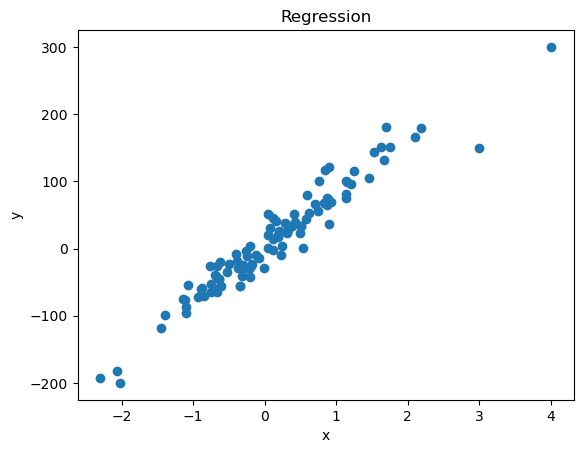

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression")

In [4]:
import pandas as pd
model=sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.61e-61
Time:                        13:07:35   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

Text(0.5, 1.0, 'leverage')

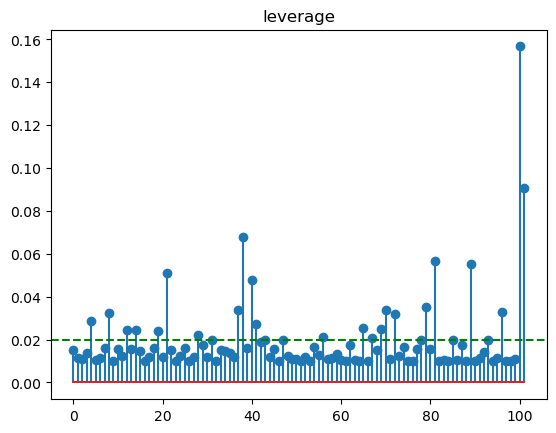

In [5]:
#영향도 값
influence=result.get_influence()
# 레버리지 벡터의 값
hat=influence.hat_matrix_diag
#print(hat)
#막대그래프와 비슷하지만 폭이 없는 그래프
plt.stem(hat)
#0.02에 가로 점선 추가
plt.axhline(0.02, c="g", ls="--")
plt.title("leverage")
#마지막에 추가한 이상치를 제외하면 대부분의 값들은 0.02 근처의 낮은 값들

In [6]:
hat.sum() #합계는 2에 수렴함

2.0000000000000004

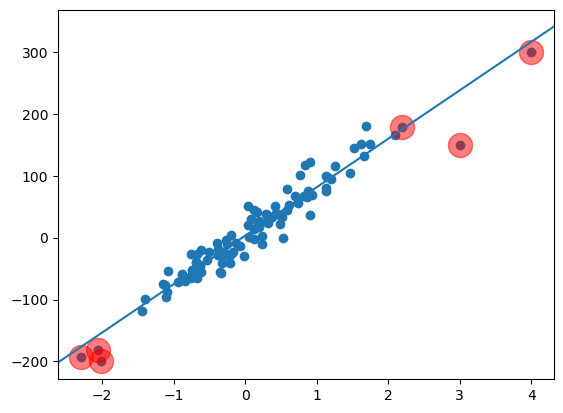

In [8]:
#레버리지 값이 0.05보다 큰 샘플 강조
ax=plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)
idx=hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

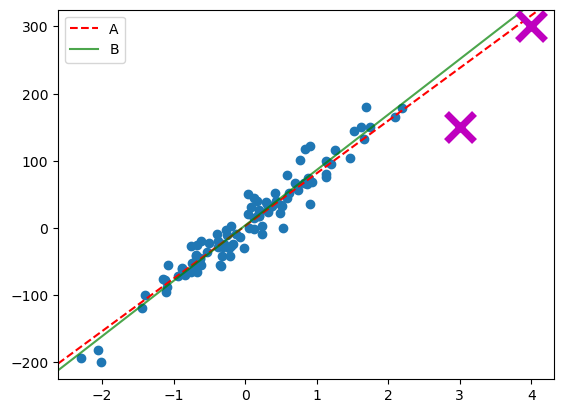

In [22]:
#레버리지가 높은 데이터가 회귀분석에 미치는 영향
model2=sm.OLS(y[:-2], X[:-2]) # 이상치 두개 제외
result2=model2.fit()
ax=plt.subplot()
plt.scatter(X0, y)
#레버리지가 큰 데이터를 포함한 모형
sm.graphics.abline_plot(model_results=result,
 c="r", linestyle="--", ax=ax, label='A')
#레버리지가 큰 데이터를 포함하지 않은 모형
sm.graphics.abline_plot(model_results=result2, 
                        c="g", alpha=0.7, ax=ax, label='B')
# ms(marker size), mew(marker edge width)
#이상치
plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend()
plt.show()

In [23]:
model2=sm.OLS(y[:-2], X[:-2]) # 이상치 두개 제외
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1571.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.89e-62
Time:                        14:35:49   Log-Likelihood:                -432.24
No. Observations:                 100   AIC:                             868.5
Df Residuals:                      98   BIC:                             873.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0540      1.846      2.196      0.0

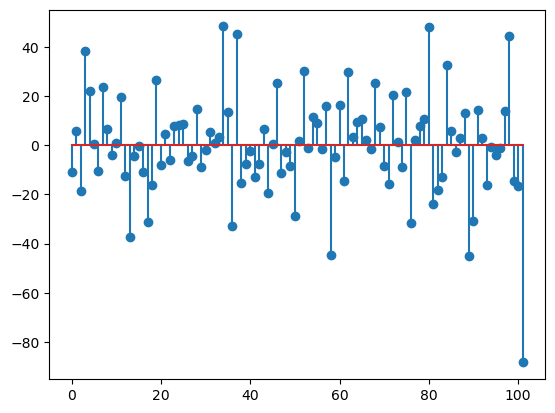

In [10]:
# 각 샘플의 잔차
plt.stem(result.resid)
plt.show()

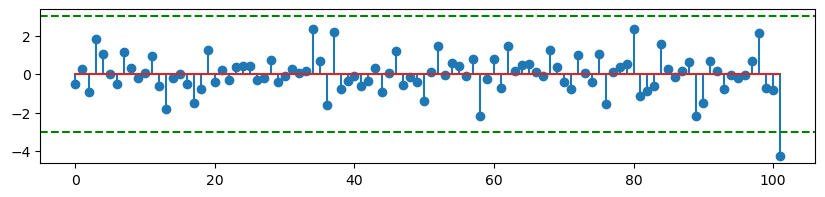

In [11]:
# 각 샘플의 표준화 잔차(잔차를 스케일링한 값, 일반적으로 2~4보다 크면 아웃라이어로 본다.)
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.show()

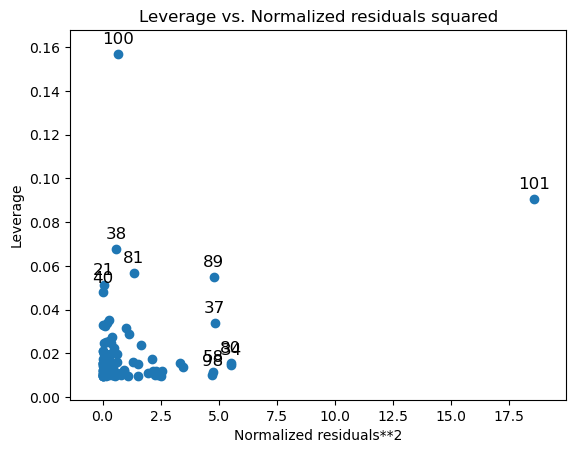

In [12]:
#레버리지와 잔차의 크기가 모두 큰 데이터들을 보기 위한 그래프
#x축: 표준화 잔차의 제곱, y축: 레버리지값
#숫자가 표시된 데이터들 확인
sm.graphics.plot_leverage_resid2(result)
plt.show()

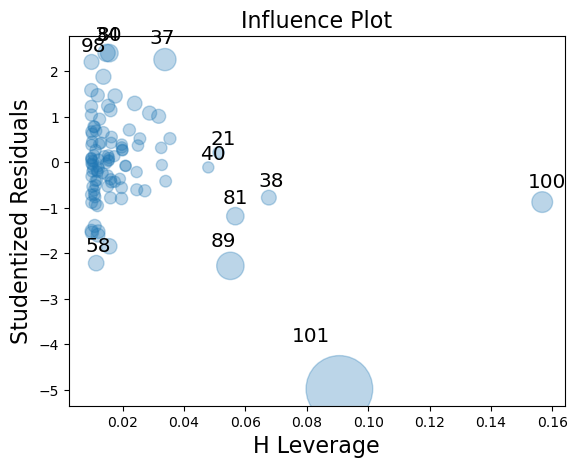

In [13]:
#레버리지와 잔차의 크기가 모두 큰 데이터들을 시각적으로 표현
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()
#샘플의 인덱스 확인(인덱스 100,101번이 outlier)

In [15]:
from sklearn.datasets import load_boston
boston=load_boston()

In [16]:
dfX0=pd.DataFrame(boston.data, columns=boston.feature_names)
# 회귀분석에서 수식을 간단하게 만들기 위해
# 독립변수의 첫번째 필드에 상수항 1을 추가(augmentation)
dfX=sm.add_constant(dfX0)
dfy=pd.DataFrame(boston.target, columns=["MEDV"])

In [17]:
model_boston=sm.OLS(dfy, dfX)
result_boston=model_boston.fit()
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        13:10:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

<AxesSubplot:>

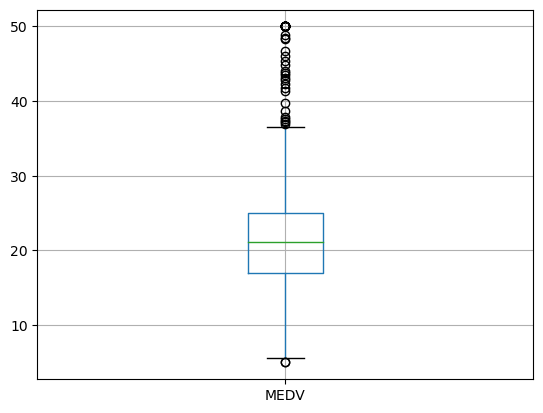

In [18]:
dfy.boxplot()

In [19]:
#주택가격이 40이상일 때 40으로 낮추는 방법
dfy.loc[dfy.MEDV >= 40, 'MEDV']=40
model_boston2=sm.OLS(dfy, dfX)
result_boston2=model_boston2.fit()
result_boston2.summary()
#74.1%->78.2%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     135.8
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          2.23e-153
Time:                        13:10:26   Log-Likelihood:                -1385.7
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     492   BIC:                             2859.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1624      4.081      9.350      0.000      30.143      46.182
CRIM          -0.1109      0.026     -4.219      0.000      -0.163      -0.059
ZN             0.0370      0.011      3.374      0.001       0.015       0.059
INDUS         -0.0139      0.049     -0.283      0.777      -0.111       0.083
CHAS           1.7865      0.689      2.593      0.010       0.433       3.140
NOX          -15.4649      3.055     -5.062      0.000     -21.467      -9.463
RM             2.8793      0.334      8.615      0.000       2.223       3.536
AGE           -0.0060      0.011     -0.567      0.571      -0.027       0.015
DIS           -1.2519      0.160     -7.848      0.000      -1.565      -0.938
RAD            0.2704      0.053      5.096      0.000       0.166       0.375
TAX           -0.0116      0.003     -3.867      0.000      -0.018      -0.006
PTRATIO       -0.8203      0.105     -7.840      0.000      -1.026      -0.615
B              0.0083      0.002      3.843      0.000       0.004       0.012
LSTAT         -0.4797      0.041    -11.828      0.000      -0.559      -0.400
==============================================================================
Omnibus:                       93.466   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.094
Skew:                           0.971   Prob(JB):                     2.39e-46
Kurtosis:                       5.488   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# 이상치라고 생각되는 MEDV >= 40 이상인 값들
idx=np.where(dfy >= 40)[0]
idx

array([ 98, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 224, 225,
       228, 232, 233, 253, 256, 257, 261, 262, 267, 268, 280, 282, 283,
       368, 369, 370, 371, 372], dtype=int64)

In [21]:
#아웃라이어를 제외한 후 회귀 분석을 한 결과
idx2=list(set(range(len(dfX))).difference(idx))
#행인덱스를 새롭게 부여하고 인덱스 필드는 제거
dfX=dfX.iloc[idx2, :].reset_index(drop=True)
dfy=dfy.iloc[idx2, :].reset_index(drop=True)
model_boston3=sm.OLS(dfy, dfX)
result_boston3=model_boston2.fit()
print(result_boston3.summary())
# R-squared: 74.1% => 78.2%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     135.8
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          2.23e-153
Time:                        13:10:50   Log-Likelihood:                -1385.7
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     492   BIC:                             2859.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1624      4.081      9.350      0.0